<a href="https://colab.research.google.com/github/Madinanachan/the-strain-game/blob/master/notebooks/Project_2_clean_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from bs4 import BeautifulSoup
import requests
from google.colab import files
import pandas as pd 
import numpy as np

import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

     |████████████████████████████████| 102kB 3.3MB/s 
     |████████████████████████████████| 133kB 5.0MB/s 
     |████████████████████████████████| 614kB 38.7MB/s 
     |████████████████████████████████| 235kB 41.3MB/s 
     |████████████████████████████████| 307kB 46.1MB/s 
     |████████████████████████████████| 215kB 36.2MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 61kB 6.6MB/s 
     |████████████████████████████████| 737kB 39.7MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145035 sha256=518aa25ddcc30285b01b31eec5d2c52c84ea71274987834962f9e4ce45981750
  Stored in directory: /root/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=76cd175b029aea549513a2fe3ae4ffd04ac6505cd20636a3a41a94c1e9e88eaa
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d

In [6]:
uploaded=files.upload()

Saving straindata.csv to straindata.csv


In [0]:
df=pd.read_csv('straindata.csv')

In [8]:
df.head()

,Main Symptom,Secondary Symptom,Main Effect,Secondary Effect,Strain Type,THC,Taste,CBD
0,Stress,Anxiety,Euphoric,Creative,Hybrid,none,none,False
1,Stress,Depression,Relaxed,Happy,Hybrid,20.5%,Herbal,False
2,Stress,Depression,Relaxed,Happy,Hybrid,18.5%,Peppery,False
3,Stress,Pain,Relaxed,Happy,Indica,13.5%,Herbal,False
4,Stress,Pain,Happy,Euphoric,Hybrid,14.5%,Herbal,False


In [9]:
df.describe()

,Main Symptom,Secondary Symptom,Main Effect,Secondary Effect,Strain Type,THC,Taste,CBD
count,384,384,384,384,384,384,384,384
unique,5,5,7,9,3,28,6,2
top,Stress,Pain,Relaxed,Happy,Hybrid,none,none,False
freq,314,140,195,157,191,86,197,377


In [10]:
df.dtypes


Main Symptom         object
Secondary Symptom    object
Main Effect          object
Secondary Effect     object
Strain Type          object
THC                  object
Taste                object
CBD                    bool
dtype: object

In [11]:
df=df.astype(str)
df.dtypes

Main Symptom         object
Secondary Symptom    object
Main Effect          object
Secondary Effect     object
Strain Type          object
THC                  object
Taste                object
CBD                  object
dtype: object

In [12]:
df['THC'].describe()

count      384
unique      28
top       none
freq        86
Name: THC, dtype: object

In [13]:
df['THC'] = df['THC'].str.replace('%','')
df['THC']=df['THC'].replace('none',16.5)
df.head()

,Main Symptom,Secondary Symptom,Main Effect,Secondary Effect,Strain Type,THC,Taste,CBD
0,Stress,Anxiety,Euphoric,Creative,Hybrid,16.5,none,False
1,Stress,Depression,Relaxed,Happy,Hybrid,20.5,Herbal,False
2,Stress,Depression,Relaxed,Happy,Hybrid,18.5,Peppery,False
3,Stress,Pain,Relaxed,Happy,Indica,13.5,Herbal,False
4,Stress,Pain,Happy,Euphoric,Hybrid,14.5,Herbal,False


In [14]:
df['Main Symptom'].unique()
df['Taste'].unique()

array(['none', 'Herbal', 'Peppery', 'Fruity', 'Citrus', 'Pine'],
      dtype=object)

In [15]:
df['THC']=pd.to_numeric(df['THC'])
df.describe()
len(df['THC'])

384

In [16]:
df['THC Level']=df['THC']
for i in range(len(df['THC'])):  
  if df['THC'][i]==16.5:
    df['THC Level'][i]='Normal'
  elif df['THC'][i]>16.5:
    df['THC Level'][i]='High'
  else:
    df['THC Level'][i]='Low'

df['Mood']=df['Main Effect']
for i in range(len(df['Mood'])):
  if df['Main Effect'][i]=='Happy':
    df['Mood'][i]='Energizing';
  elif df['Main Effect'][i]=='Uplifted':
    df['Mood'][i]='Energizing';
  elif df['Main Effect'][i]=='Energetic':
    df['Mood'][i]='Energizing';
  elif df['Main Effect'][i]=='Relaxed':
     df['Mood'][i]='Sedating';
  elif df['Main Effect'][i]=='Sleepy':
     df['Mood'][i]='Sedating';
  elif df['Main Effect'][i]=='Creative':
     df['Mood'][i]='Sedating';
  else:
    df['Mood'][i]='none'
  
df['Pain Type']=df['Secondary Symptom']
for i in range(len(df['Secondary Symptom'])):
  if df['Secondary Symptom'][i]=='Pain':
    df['Pain Type'][i]='Physical'
  elif df['Secondary Symptom'][i]=='Insomnia':
    df['Pain Type'][i]='Physical'
  elif df['Secondary Symptom'][i]=='Depression':
    df['Pain Type'][i]='Cerebral'
  elif df['Secondary Symptom'][i]=='Anxiety':
    df['Pain Type'][i]='Cerebral'
  else:
    df['Pain Type'][i]='none'

    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/d

In [17]:
df.head()

,Main Symptom,Secondary Symptom,Main Effect,Secondary Effect,Strain Type,THC,Taste,CBD,THC Level,Mood,Pain Type
0,Stress,Anxiety,Euphoric,Creative,Hybrid,16.5,none,False,Normal,none,Cerebral
1,Stress,Depression,Relaxed,Happy,Hybrid,20.5,Herbal,False,High,Sedating,Cerebral
2,Stress,Depression,Relaxed,Happy,Hybrid,18.5,Peppery,False,High,Sedating,Cerebral
3,Stress,Pain,Relaxed,Happy,Indica,13.5,Herbal,False,Low,Sedating,Physical
4,Stress,Pain,Happy,Euphoric,Hybrid,14.5,Herbal,False,Low,Energizing,Physical


In [0]:
features=['Secondary Symptom','Main Effect','Secondary Effect','THC Level','Mood', 'Pain Type']
#Original target='Strain Type' features='Secondary Symptom','Main Effect','Secondary Effect','THC','THC Level'
target='Strain Type'

In [0]:
from sklearn.model_selection import train_test_split
train, test= train_test_split(df,test_size=0.2,random_state=42)

In [20]:
train.shape

(307, 11)

In [0]:
val, test=train_test_split(test,test_size=0.2,random_state=42)

In [22]:
test.shape

(16, 11)

In [23]:
val.shape

(61, 11)

In [0]:
x_train=train[features]
y_train=train[target]
x_val=val[features]
y_val=val[target]
x_test=test[features]
y_test=test[target]


In [25]:
y_train.describe()

count        307
unique         3
top       Hybrid
freq         150
Name: Strain Type, dtype: object

In [26]:
150/307

0.48859934853420195

In [0]:
#Baseline, if we always assume the Strain is Hybrid: ~49% accuracy (About half of all strains are Hybrid)

In [28]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(), 
    StandardScaler(), 
    LogisticRegressionCV(multi_class='auto', solver='lbfgs', cv=5, n_jobs=-1)
)

lr.fit(x_train, y_train)
score = lr.score(x_val, y_val)
print('Validation Accuracy', score)
print('Train Accuracy',lr.score(x_train,y_train))

Validation Accuracy 0.5901639344262295
Train Accuracy 0.6547231270358306


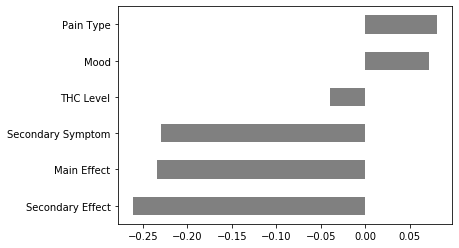

In [29]:
model = lr.named_steps['logisticregressioncv']
encoder = lr.named_steps['ordinalencoder']
encoded_columns = encoder.transform(x_val[features]).columns
coefficients = pd.Series(model.coef_[0], encoded_columns)
coefficients.sort_values().plot.barh(color='grey');

In [30]:
from sklearn.tree import DecisionTreeClassifier
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='most_frequent'), 
    DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
)
pipeline.fit(x_train, y_train);

print('Train Accuracy',pipeline.score(x_train,y_train))
print('Validation Accuracy',pipeline.score(x_val,y_val))
print('Test Accuracy',pipeline.score(x_test,y_test))#This Model unlike the ones following it can accurately predict Sativas

Train Accuracy 0.6514657980456026
Validation Accuracy 0.5573770491803278
Test Accuracy 0.75


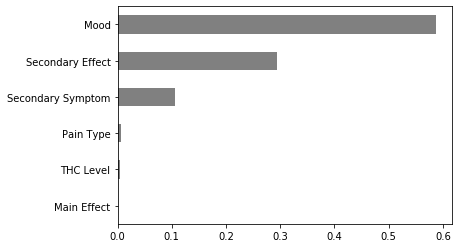

In [31]:
import matplotlib.pyplot as plt

model = pipeline.named_steps['decisiontreeclassifier']
encoder = pipeline.named_steps['ordinalencoder']
encoded_columns = encoder.transform(x_val).columns
importances = pd.Series(model.feature_importances_, encoded_columns)
importances.sort_values().plot.barh(color='grey')

In [32]:
from sklearn.ensemble import RandomForestClassifier

pipeline2 = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='most_frequent'), 
    RandomForestClassifier(n_estimators=75,min_samples_leaf=20, random_state=42,n_jobs=-1)
)
pipeline2.fit(x_train, y_train);
print('Train Accuracy', pipeline2.score(x_train, y_train))
print('Validation Accuracy', pipeline2.score(x_val, y_val))
print('Test Accuracy',pipeline2.score(x_test,y_test))

Train Accuracy 0.6384364820846905
Validation Accuracy 0.6065573770491803
Test Accuracy 0.6875


In [33]:
pipeline4 = make_pipeline(
    ce.OneHotEncoder(), 
    SimpleImputer(strategy='most_frequent'), 
    DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
)
pipeline4.fit(x_train, y_train);

print('Train Accuracy',pipeline4.score(x_train,y_train))
print('Validation Accuracy',pipeline4.score(x_val,y_val))
print('Test Accuracy',pipeline4.score(x_test,y_test))

Train Accuracy 0.6872964169381107
Validation Accuracy 0.6065573770491803
Test Accuracy 0.6875


In [36]:
pip install dexplot

# New Section

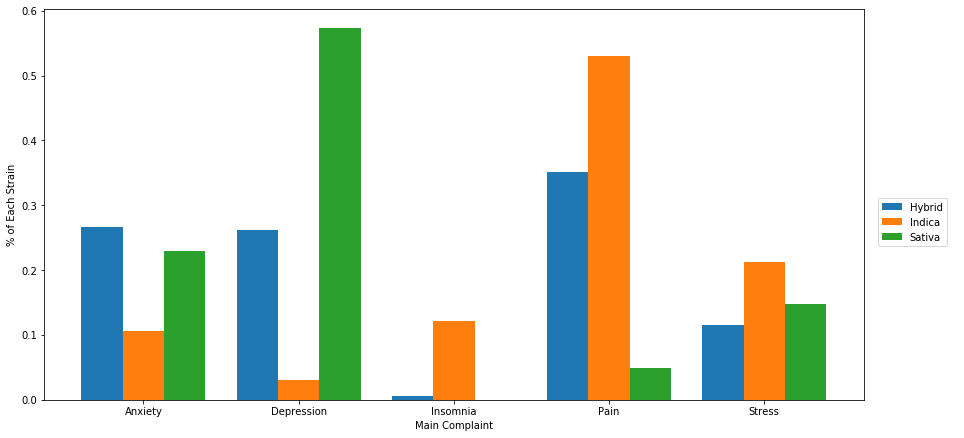

In [63]:
import dexplot as dxp

fig=dxp.aggplot(agg='Secondary Symptom', data=df, hue='Strain Type',normalize='Strain Type')
plt.xlabel('Main Complaint')
plt.ylabel('% of Each Strain') 
plt;
#Sativa mainly serves Depression, Indica serves pain, Hybrids do all

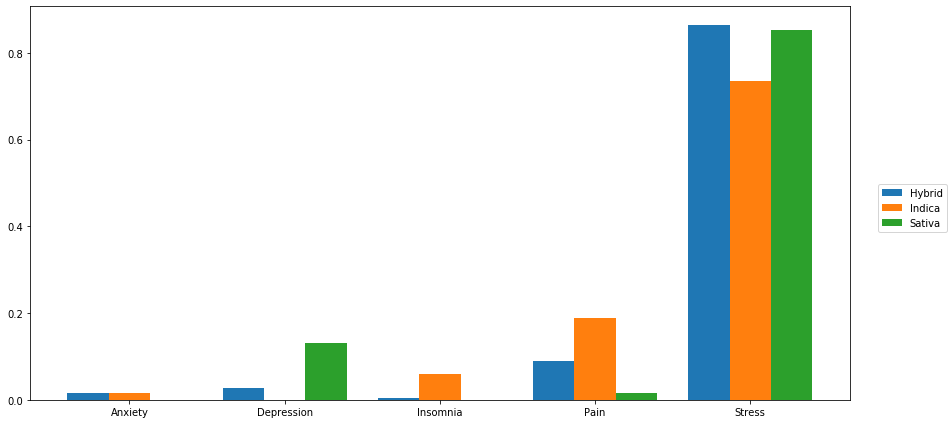

In [38]:
dxp.aggplot(agg='Main Symptom', data=df, hue='Strain Type', normalize='Strain Type')#Unhelpful. All peaple are stressed

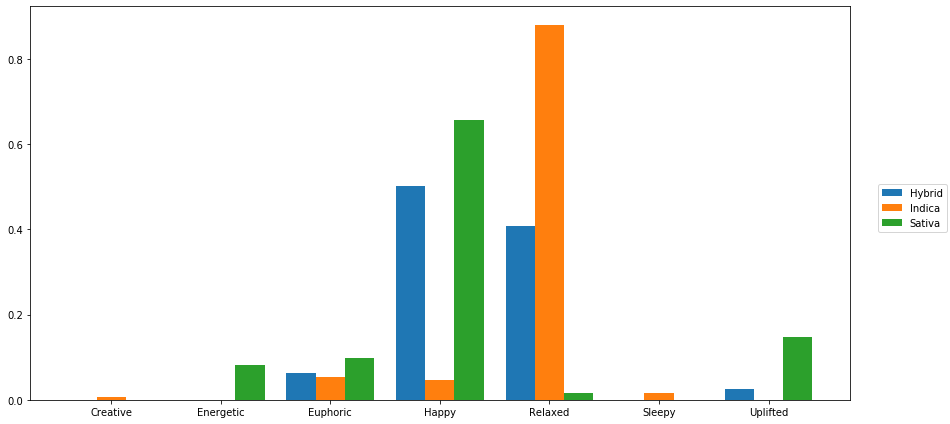

In [39]:
dxp.aggplot(agg='Main Effect', data=df, hue='Strain Type', normalize='Strain Type')#Indicas will relax, Sativas make happy

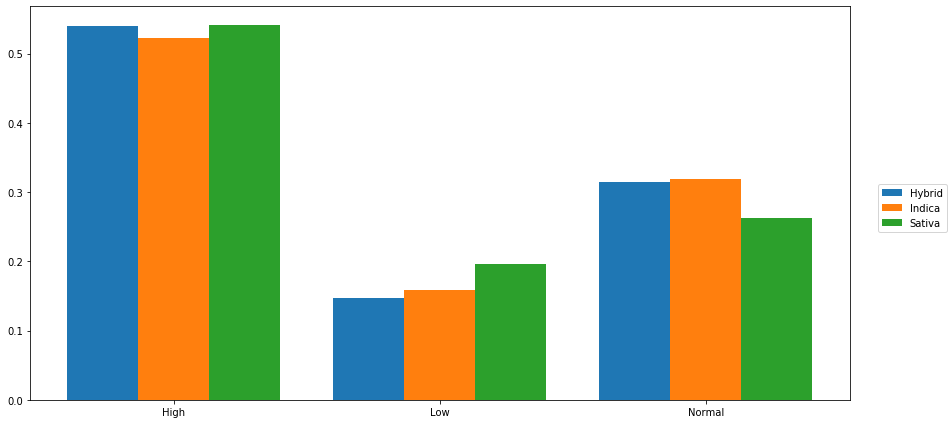

In [40]:
dxp.aggplot(agg='THC Level', data=df, hue='Strain Type', normalize='Strain Type')

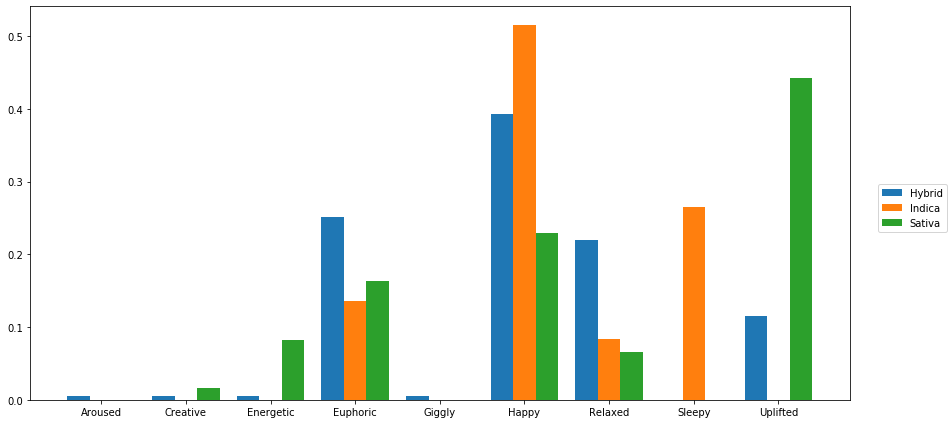

In [41]:
	
dxp.aggplot(agg='Secondary Effect', data=df, hue='Strain Type', normalize='Strain Type')

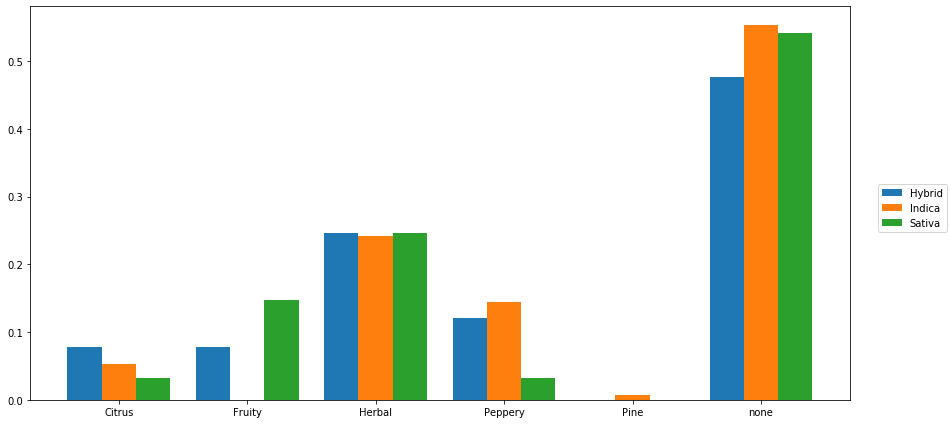

In [42]:
dxp.aggplot(agg='Taste', data=df, hue='Strain Type', normalize='Strain Type')

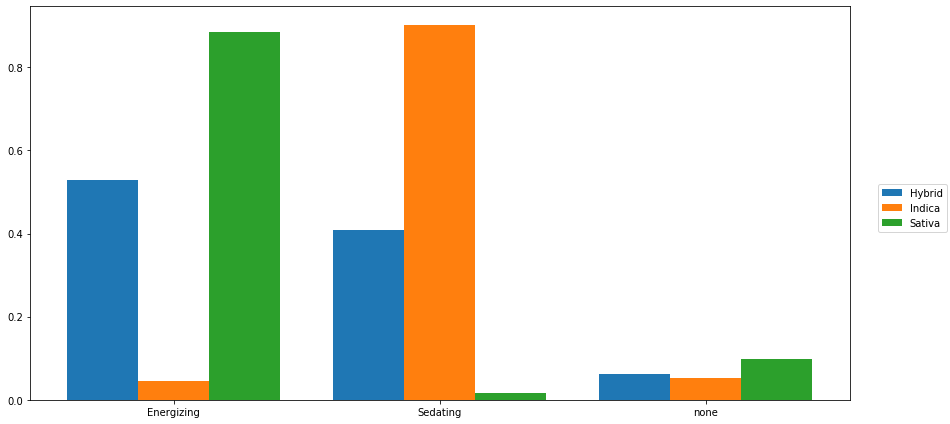

In [43]:
dxp.aggplot(agg='Mood', data=df, hue='Strain Type',normalize='Strain Type')#More proof that Hybrids  are a splitting middle

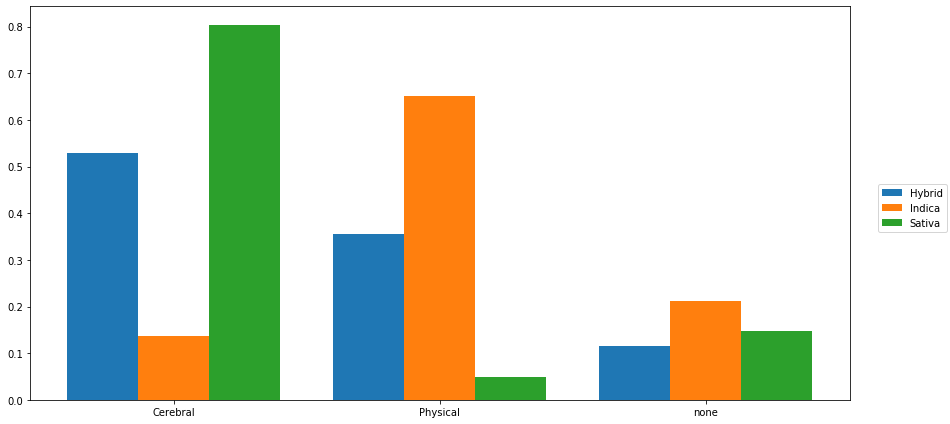

In [44]:
dxp.aggplot(agg='Pain Type', data=df, hue='Strain Type',normalize='Strain Type')

In [0]:
y_pred=pipeline.predict(x_test)

In [46]:
print(y_pred[0])#Pipeline2 has a hard time with Sativas
print(y_pred[1])#Pipeline1 can predict Sativas. Likely guessing into the parentage of the hybrids 
print(y_pred[2])
print(y_pred[3])
print(y_pred[4])
print(y_pred[5])
print(y_pred[6])
print(y_pred[7])
print(y_pred[9])
print(y_pred[10])
print(y_pred[11])
print(y_pred[12])
print(y_pred[13])
print(y_pred[14])
print(y_pred[15])

Indica
Sativa
Sativa
Hybrid
Hybrid
Hybrid
Indica
Hybrid
Indica
Indica
Sativa
Indica
Indica
Indica
Indica


In [47]:
x_test.head()

,Secondary Symptom,Main Effect,Secondary Effect,THC Level,Mood,Pain Type
56,Pain,Relaxed,Happy,Normal,Sedating,Physical
327,Stress,Happy,Uplifted,Normal,Energizing,none
245,Depression,Energetic,Uplifted,High,Energizing,Cerebral
268,Anxiety,Happy,Relaxed,Normal,Energizing,Cerebral
22,Anxiety,Happy,Euphoric,Low,Energizing,Cerebral


In [48]:
print(y_test)#My suggestion would be to gather more sativa datasets to round out the data. Also to maybe rename some of the hybrids that are really sativa dominants to sativa

56     Indica
327    Sativa
245    Sativa
268    Hybrid
22     Sativa
77     Hybrid
354    Indica
198    Hybrid
30     Sativa
0      Hybrid
380    Indica
63     Hybrid
367    Hybrid
195    Indica
5      Indica
78     Indica
Name: Strain Type, dtype: object


In [49]:
from joblib import dump

dump(pipeline,'pipeline.joblib',compress=True)

['pipeline.joblib']

In [0]:
files.download('pipeline.joblib')

In [0]:
import joblib
import sklearn
import category_encoders as ce

In [52]:
print(f'joblib=={joblib.__version__}')

joblib==0.14.0


In [53]:
print(f'scikit-learn=={sklearn.__version__}')

scikit-learn==0.21.3


In [54]:
print(f'category_encoders=={ce.__version__}')

category_encoders==2.1.0


In [0]:
def prediction (maincmpl,eff1,eff2,Tolerance,Energy,Discomfort):
  df=pd.DataFrame(
      columns=['Secondary Symptom','Main Effect','Secondary Effect','THC Level','Mood', 'Pain Type'],
      data = [[maincmpl,eff1,eff2,Tolerance,Energy,Discomfort]]
  )
  y_pred=pipeline.predict(df)[0]
  return f'{y_pred}'


In [56]:
prediction('Depression','Energetic','Happy','Low','Energizing','Cerebral')

'Sativa'

In [57]:
prediction('Anxiety','Euphoric','Relaxed','high','Sedating','Cerebral')

'Hybrid'

In [58]:
prediction('Pain','Relaxed','Uplifted','Normal','Energizing','Physical')

'Sativa'

In [0]:
df.to_csv('cleanweed.csv',index=False, encoding='utf-8')